<b>¡Hola Andrea!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Step 1. Load and prepare data for analysis

In [1]:
import pandas as pd

logs = pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")
print(logs.head())
logs.info()

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


# Step 2. Data preprocessing

## Rename columns

In [2]:
logs.rename(columns={"EventName":"Event", "DeviceIDHash":"UserId","EventTimestamp":"EventDateTime", "ExpId":"Group"},inplace=True)
print(logs.head())

                     Event               UserId  EventDateTime  Group
0         MainScreenAppear  4575588528974610257     1564029816    246
1         MainScreenAppear  7416695313311560658     1564053102    246
2  PaymentScreenSuccessful  3518123091307005509     1564054127    248
3         CartScreenAppear  3518123091307005509     1564054127    248
4  PaymentScreenSuccessful  6217807653094995999     1564055322    248


## Convert columns to date_time format

In [3]:
logs["EventDateTime"] = pd.to_datetime(logs["EventDateTime"], unit="s")

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has hecho un excelente trabajo al convertir las fechas a un formato datetime. Esto es crucial para cualquier análisis temporal posterior y demuestra un buen manejo de las funciones de pandas.
</div>


## Validate and treat missing data

In [4]:
print(logs.isnull().sum())
logs.info()
logs.head()

Event            0
UserId           0
EventDateTime    0
Group            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Event          244126 non-null  object        
 1   UserId         244126 non-null  int64         
 2   EventDateTime  244126 non-null  datetime64[ns]
 3   Group          244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


,Event,UserId,EventDateTime,Group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has verificado correctamente los valores nulos en el conjunto de datos. 
</div>


## Add extra column for Date

In [5]:
logs["Date"] = logs["EventDateTime"].dt.date
print(logs.head())
logs['Date'] = pd.to_datetime(logs['EventDateTime'].dt.date)

                     Event               UserId       EventDateTime  Group  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   

         Date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


# Step 3. Study and validate data

## How many events are in the logs?

In [6]:
event_type = logs["Event"].value_counts()
print(event_type)
print("Total events:",logs["Event"].count())

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: Event, dtype: int64
Total events: 244126


<div class="alert alert-block alert-warning">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
El análisis de eventos por usuario es un buen comienzo. Para profundizar, podrías evaluar la distribución de eventos por usuario usando un gráfico de caja. Esto te permitirá identificar patrones o comportamientos atípicos de manera visual.
</div>


## How many users are there in the logs?

In [7]:
unique_users = logs["UserId"].nunique()
print(unique_users)

7551


## What is the average events by user?

In [8]:
events_by_user = logs.groupby("UserId")["Event"].count()
print(events_by_user.mean().round())


32.0


## What period of time is coverd by data?
Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [9]:
min_date = logs["EventDateTime"].min()
max_date = logs["EventDateTime"].max()
dates = logs["Date"].nunique()
print(min_date, max_date, dates)

2019-07-25 04:43:36 2019-08-07 21:15:17 14


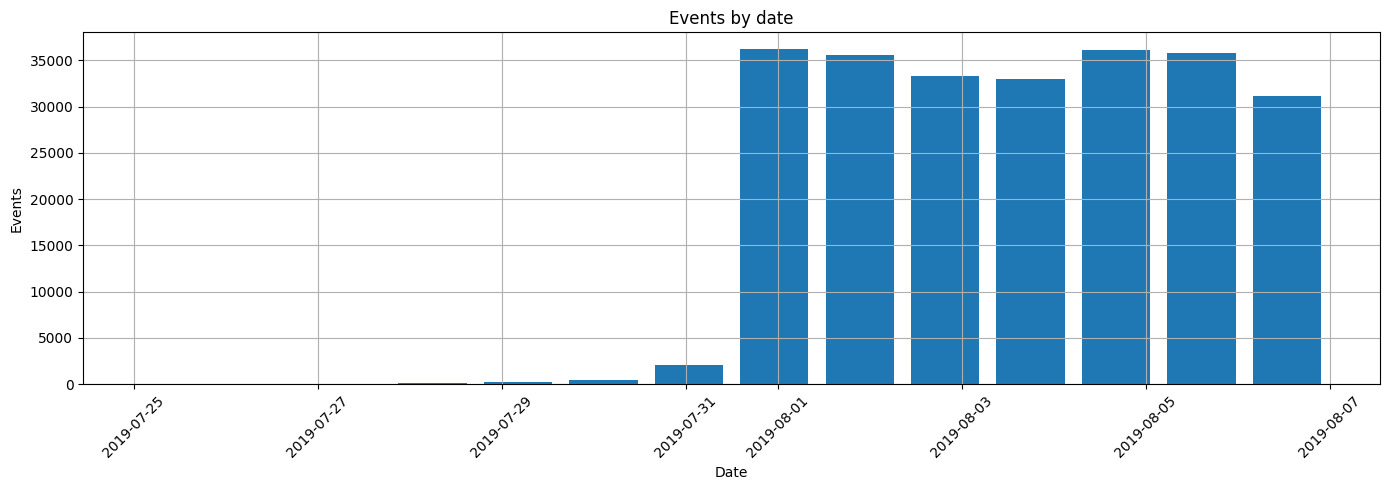

In [10]:
# Histogram by date
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
logs["Date"].hist(bins=logs["Date"].nunique(), rwidth=0.8)
plt.title("Events by date")
plt.xlabel("Date")
plt.ylabel("Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Excelente uso de histogramas para visualizar la distribución de eventos por fecha. Esto facilita la identificación de tendencias temporales en los datos y es una herramienta valiosa para el análisis exploratorio.
</div>


The data ranges from July 25th 2019 to August 7th 2019. Histogram shows that days from July 25th to July 31st have very low activity. This might indicate that data is missing. Starting August 1st we see a significant increase in daily events. Considering this, it might be best to narrow down the analysis period from August 1st onwards. 

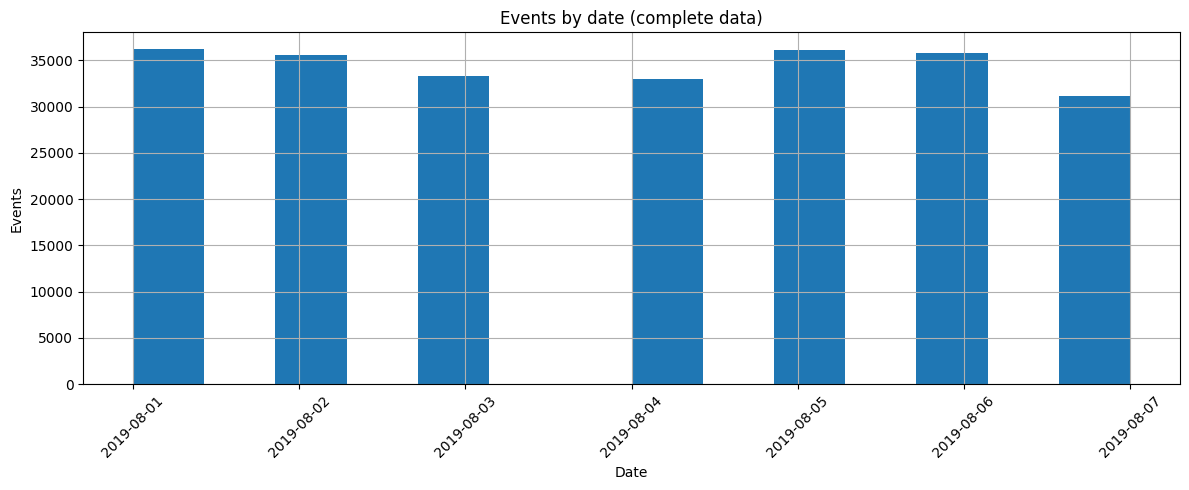

In [11]:
# Filter data from August 1st onwards

logs_filtered = logs[logs["Date"]>="2019-08-01"].copy()
plt.figure(figsize=(12,5))
logs_filtered["Date"].hist(bins=logs["Date"].nunique())
plt.title("Events by date (complete data)")
plt.xlabel("Date")
plt.ylabel("Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

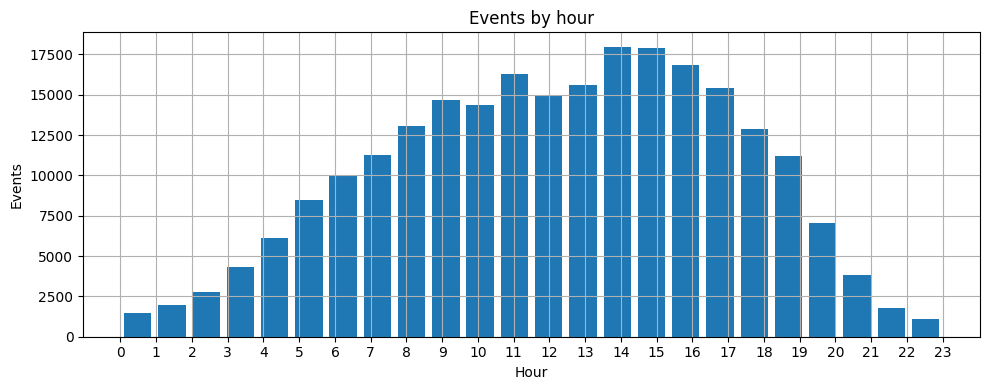

In [12]:
# Histogram by hour using filtered data

# extract hour
logs_filtered["Hour"] = logs_filtered["EventDateTime"].dt.hour


plt.figure(figsize=(10, 4))
logs_filtered["Hour"].hist(bins=24, rwidth=0.8)
plt.title("Events by hour")
plt.xlabel("Hour")
plt.ylabel("Events")
plt.xticks(range(0, 24)) # show exactly 24 hours
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La visualización de eventos por hora es útil para identificar patrones diarios. 
</div>


## Were many events and users were lost after excluding oldest data?

In [13]:
event_type = logs["Event"].value_counts()
print(event_type)
print("Total events:",logs["Event"].count())
filtered_event_type = logs_filtered["Event"].value_counts()
print("\nEvents after removing oldest data:")
print("\n",filtered_event_type)
print("Total events after filtering:",logs_filtered["Event"].count())
print("Events deleted:", 244126-241298)

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: Event, dtype: int64
Total events: 244126

Events after removing oldest data:

 MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: Event, dtype: int64
Total events after filtering: 241298
Events deleted: 2828


Less than 5% of the data were deleted.

In [14]:

unique_users = logs["UserId"].nunique()
print(unique_users) 
filtered_unique_users = logs_filtered["UserId"].nunique()
print("\nUnique users after removing oldest data:",filtered_unique_users)
print("Users deleted:", 7551-7534)

7551

Unique users after removing oldest data: 7534
Users deleted: 17


Only 17 users were deleted.

## Make sure you have users of the 3 experimental groups.

In [15]:

users_by_group = logs_filtered.groupby("Group")["UserId"].nunique()

print(users_by_group)

Group
246    2484
247    2513
248    2537
Name: UserId, dtype: int64


<div class="alert alert-success">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
Has hecho un buen trabajo al agrupar los usuarios por grupo experimental. Esta agrupación es crucial para evaluar la efectividad de los experimentos A/B y te permitirá realizar comparaciones significativas entre los grupos.
</div>


# Step 4. Study event funnel

## See how many events are in the logs and their frequency. Sort them by frequency.

In [16]:
filtered_event_type = logs_filtered["Event"].value_counts()
print("Events by frequency:","\n",filtered_event_type)

Events by frequency: 
 MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: Event, dtype: int64


## Find the amount of users who made each of these events. Sort the values by user amount. Estimate the proportion of users that made the same action at least once. 

In [17]:
# Estimate users by event type
users_by_event_type = logs_filtered.groupby("Event")["UserId"].nunique().sort_values(ascending=False)

# User proportion by event using filtered_unique_users
user_proportion = users_by_event_type / filtered_unique_users 

# Create chart
users_funnel = pd.DataFrame({"Users": users_by_event_type,
                            "Proportion":user_proportion})
print(users_funnel)




                         Users  Proportion
Event                                     
MainScreenAppear          7419    0.984736
OffersScreenAppear        4593    0.609636
CartScreenAppear          3734    0.495620
PaymentScreenSuccessful   3539    0.469737
Tutorial                   840    0.111495


<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Al calcular la proporción de usuarios por tipo de evento, considera incluir una visualización para mostrar estas proporciones de manera más clara. Un gráfico de barras apiladas podría ser una buena opción para visualizar las diferencias entre tipos de eventos.
</div>


## In what order do you think the actions occurred? Are they all part of a single sequence? It's not necessary to take them into account when calculating the funnel.

1. Tutorial 
2. MainScreenAppear
3. OffersScreenAppear
4. CartScreenAppear
5. PaymentScreenSuccesful

The tutorial event might not be part of a sequence since it could be watched only by new users. Not every user might have purchased something, so only the last screen (PaymentScreenSuccesful) shows users who went through the entire sequence.

## Use the users funnel to find the proportion of users that convert from one stage to another.



In [18]:
# Create list with sequence of event names

event_sequence = [
    "MainScreenAppear", #index 0
    "OffersScreenAppear", # i 1
    "CartScreenAppear", # i 2
    "PaymentScreenSuccessful" # i 3
]
# loop to estimate proportion from one stage to the next

for i in range(1, len(event_sequence)): # range(1,4) 
#iterates through each pair of current-previous event
    previous_event = event_sequence[i - 1]
    current_event = event_sequence[i]
# Gets the number of users in every stage, enters users_funnel and extracts number of
# unique users in that stage (event)
    previous_users = users_funnel.loc[previous_event, "Users"]
    current_users = users_funnel.loc[current_event, "Users"]
    
    conversion = current_users / previous_users
    
    print(f"Conversion rate (Proportion) of {previous_event} → {current_event}: {conversion:.2%}")
    

Conversion rate (Proportion) of MainScreenAppear → OffersScreenAppear: 61.91%
Conversion rate (Proportion) of OffersScreenAppear → CartScreenAppear: 81.30%
Conversion rate (Proportion) of CartScreenAppear → PaymentScreenSuccessful: 94.78%


## At which stage are more users lost?

The conversion rate from MainScreenAppear to OffersScreenAppear is the lowest, meaning only 62% of the users who visit the app (regardless if they watched the tutorial or not) go to explore offers. Of these users, only 81% add something to their cart and 95% of these users complete their payment.

## What percentage of users make the entire journey from their first event to payment?

In [19]:
#Estimate global conversion

global_conversion = users_funnel.loc["PaymentScreenSuccessful", "Users"] / users_funnel.loc["MainScreenAppear", "Users"]
# .loc[row,column]
print(f"Global conversion (MainScreen → Payment): {global_conversion:.2%}")

Global conversion (MainScreen → Payment): 47.70%


Around 47% of the total users than enter the app make a purchase.

# Step 5. Analysis of experiments result

## How many users are in each group?

In [20]:
users_by_group = logs_filtered.groupby("Group")["UserId"].nunique()
print(users_by_group)

Group
246    2484
247    2513
248    2537
Name: UserId, dtype: int64


## We have two control groups in A/A test, where we prove mecanisms and calculations. Verify if there is a statistically significant difference among samples 246 and 247.

In [21]:
## Filter PaymentScreenSuccesful events and estimate users that made purchases

purchases = logs_filtered[logs_filtered["Event"]=="PaymentScreenSuccessful"]
users_with_purchases = purchases.groupby("Group")["UserId"].nunique()
print("Users that made a purchase:\n", users_with_purchases)

Users that made a purchase:
 Group
246    1200
247    1158
248    1181
Name: UserId, dtype: int64


In [22]:
# Set variables for test

from scipy import stats as st
import numpy as np
import math as mth

# A/A Groups

successes = np.array([users_with_purchases[246],users_with_purchases[247]]) # users that made a purchase
trials = np.array([users_by_group[246], users_by_group[247]]) #total users

# proportion of purchase success in group 246
p1 = successes[0]/trials[0]
# proportion of purchase success in group 247
p2 = successes[1]/trials[1]

# proportion of purchase success in combined dataser
p_combined = (successes[0]+successes[1]) / (trials[0]+trials[1])

# difference between proportions
difference = p1-p2

# estimate z value
z_value = difference/mth.sqrt(p_combined*(1-p_combined)*(1/trials[0]+1/trials[1]))

# set standard normal distribution with mean 0 and standard deviation 1
distr = st.norm(0,1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)
alpha = 0.05

if (p_value < alpha):
    print("Reject null hypothesis: There is a significant difference between proportions")
else:
    print("Null hypothesis can not be rejected. There is no statistical evidence to show that there is a difference between proportions")


p-value:  0.11456679313141849
Null hypothesis can not be rejected. There is no statistical evidence to show that there is a difference between proportions


<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Has implementado correctamente la prueba de hipótesis para comparar proporciones. Sin embargo, es importante verificar los supuestos de la prueba, como la independencia de las observaciones y el tamaño suficiente de las muestras, para asegurar que los resultados sean válidos.
</div>


No significant difference between both group's convertion proportions is a good sign. It means our data is consistent and the experiment is well implemented.

## Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their proportion. Test whether the difference between the groups is statistically significant. Repeat the procedure for all the other events (you'll save time if you create a special function for this test). Can you confirm that the groups were divided correctly?

In [23]:
top_event = logs_filtered["Event"].value_counts().idxmax()
print(top_event)

MainScreenAppear


In [24]:
# Filter top event in groups 246 and 247
MainScreenAppear = logs_filtered[(logs_filtered["Event"] == "MainScreenAppear") & (logs_filtered["Group"].isin([246,247]))]

In [25]:
# Estimate number of unique users that performed this event by group

top_event_users_by_group = MainScreenAppear.groupby("Group")["UserId"].nunique()
print("Unique users by group that made a 'MainScreenAppear' event:\n", top_event_users_by_group)

Unique users by group that made a 'MainScreenAppear' event:
 Group
246    2450
247    2476
Name: UserId, dtype: int64


In [26]:
# Total unique users in groups 256 and 247
aa_group_total_users = logs_filtered[logs_filtered["Group"].isin([246,247])].groupby("Group")["UserId"].nunique()
print("Total unique users in groups 246 and 247:\n",aa_group_total_users)


Total unique users in groups 246 and 247:
 Group
246    2484
247    2513
Name: UserId, dtype: int64


In [27]:
# Proportions 

proportion246 = top_event_users_by_group[246] / aa_group_total_users[246]
proportion247 = top_event_users_by_group[247] / aa_group_total_users[247]
print(f"Proportion in group 246: {proportion246:.2%}")
print(f"Proportion in group 247: {proportion247:.2%}")

Proportion in group 246: 98.63%
Proportion in group 247: 98.53%


In [28]:
# Create function to test proportion differences between groups

def test_proportion(event_name):
    # filter logs by events    
    event_df = logs_filtered[
        (logs_filtered["Event"]== event_name) &
        (logs_filtered["Group"].isin([246,247]))
    ]
    # Users that made the event by group
    users_by_group = event_df.groupby("Group")["UserId"].nunique()

    # Total users by group (to estimate proportions)
    total_by_group = logs_filtered[
        logs_filtered["Group"].isin([246, 247])
    ].groupby("Group")["UserId"].nunique()

    # Test
    successes = np.array([users_by_group[246], users_by_group[247]])
    trials = np.array([total_by_group[246], total_by_group[247]])

    # Single proportions
    p1 = successes[0] / trials[0]
    p2 = successes[1] / trials[1]

    # Combined proportion
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2

    # Z Statistic
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
    distr = st.norm(0, 1) 
    # p-value 
    allpha = 0.05
    p_value = (1 - st.norm(0, 1).cdf(abs(z_value))) * 2

    # Evaluate p value vs alpha
    if p_value < alpha:
        conclusion = "Reject H0. There is a significative difference among proportions in both groups."
    else:
        conclusion = "Do not reject H0. There no reason to believe there is a significative difference among proportions in both groups."

    return (event_name, round(p1, 4), round(p2, 4), round(p_value, 4), conclusion)

# Execute test for every event type
results = []
for event in logs_filtered["Event"].unique():
    results.append(test_proportion(event))

# Create df with results
events_test_df = pd.DataFrame(
    results,
    columns=["Event", "Proportion 246", "Proportion 247", "p-value", "Conclusion"]
)

# Show results
print(events_test_df)


                     Event  Proportion 246  Proportion 247  p-value  \
0                 Tutorial          0.1119          0.1126   0.9377   
1         MainScreenAppear          0.9863          0.9853   0.7571   
2       OffersScreenAppear          0.6208          0.6049   0.2481   
3         CartScreenAppear          0.5097          0.4926   0.2288   
4  PaymentScreenSuccessful          0.4831          0.4608   0.1146   

                                          Conclusion  
0  Do not reject H0. There no reason to believe t...  
1  Do not reject H0. There no reason to believe t...  
2  Do not reject H0. There no reason to believe t...  
3  Do not reject H0. There no reason to believe t...  
4  Do not reject H0. There no reason to believe t...  


<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Al crear la función para probar diferencias de proporciones, considera incluir un control adicional para verificar la homogeneidad de las varianzas. Esto puede fortalecer la validez de tus conclusiones y asegurar que las comparaciones sean apropiadas.
</div>


Groups 246 and 247 were correctly divided. We compared the proportion of users performing specific events using Z-tests for proportions. 
P values were all greater than 5%, therefore H0 (user proportions performing an action are the same in both groups) can not be rejected. This means that there is no reason to believe that proportions are different between groups. This confirms that the groups were randomly and evenly split with no biases.

## Do the same for the group with altered sources. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results of the control groups. What conclusions can you draw from the experiment?

In [29]:
print(logs_filtered.head())
print(logs_filtered.info())

                   Event               UserId       EventDateTime  Group  \
2828            Tutorial  3737462046622621720 2019-08-01 00:07:28    246   
2829    MainScreenAppear  3737462046622621720 2019-08-01 00:08:00    246   
2830    MainScreenAppear  3737462046622621720 2019-08-01 00:08:55    246   
2831  OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58    246   
2832    MainScreenAppear  1433840883824088890 2019-08-01 00:08:59    247   

           Date  Hour  
2828 2019-08-01     0  
2829 2019-08-01     0  
2830 2019-08-01     0  
2831 2019-08-01     0  
2832 2019-08-01     0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Event          241298 non-null  object        
 1   UserId         241298 non-null  int64         
 2   EventDateTime  241298 non-null  datetime64[ns]
 3   Group          241298

In [30]:
# Unique events
events= logs_filtered["Event"].unique()

# Total users by group
users_by_group = logs_filtered.groupby("Group")["UserId"].nunique()

# Function to compare altered group vs control group by event

def test_event_balance(event, control_group, test_group=248, alpha=0.05):
    
    # Filter users that made the event in control group
   
    control_users = logs_filtered[
        (logs_filtered["Group"] == control_group) &
        (logs_filtered["Event"] == event)
    ]["UserId"].nunique()
    # Filter users that made the event in the test group
    test_users = logs_filtered[
        (logs_filtered["Group"] == test_group) &
        (logs_filtered["Event"] == event)
    ]["UserId"].nunique()
    # Total users (size) by group
    control_total = users_by_group[control_group]
    test_total = users_by_group[test_group]

    # Significance level
    
    alpha  = 0.05

    # Proportions
    p1 = control_users / control_total
    p2 = test_users / test_total
    # Combined 
    p_combined = (control_users + test_users) / (control_total+test_total)
     # Z Statistic
    difference = p1-p2
    z_value = difference / mth.sqrt(p_combined*(1-p_combined)*(1/control_total + 1/test_total))
    distr = st.norm(0,1)
    p_value = (1-distr.cdf(abs(z_value)))*2

    if p_value < alpha: # if p<0.05, reject H0; if p>0.05, do not reject 0.05 
        conclusion = "Reject H0. There is a significative difference among proportions in both groups."
    else:
        conclusion = "Do not reject H0. No reason to believe there is a significative difference among proportions in both groups."

    return {
        "Event": event,
        f"Group {control_group}": round(p1, 4),
        "Group 248": round(p2, 4),
        "p-value": round(p_value, 4),
        "Conclusion": conclusion
    }

# Run function to test each event in test group vs control groups
results = []

for event in events:
    results.append(test_event_balance(event,246))
    results.append(test_event_balance(event, 247))
df_results = pd.DataFrame(results)
print(df_results)


                     Event  Group 246  Group 248  p-value  \
0                 Tutorial     0.1119     0.1100   0.8264   
1                 Tutorial        NaN     0.1100   0.7653   
2         MainScreenAppear     0.9863     0.9827   0.2950   
3         MainScreenAppear        NaN     0.9827   0.4587   
4       OffersScreenAppear     0.6208     0.6035   0.2084   
5       OffersScreenAppear        NaN     0.6035   0.9198   
6         CartScreenAppear     0.5097     0.4848   0.0784   
7         CartScreenAppear        NaN     0.4848   0.5786   
8  PaymentScreenSuccessful     0.4831     0.4655   0.2123   
9  PaymentScreenSuccessful        NaN     0.4655   0.7373   

                                          Conclusion  Group 247  
0  Do not reject H0. No reason to believe there i...        NaN  
1  Do not reject H0. No reason to believe there i...     0.1126  
2  Do not reject H0. No reason to believe there i...        NaN  
3  Do not reject H0. No reason to believe there i...     0.9853 

We can see that the p-value is greater than 0.05 fo all Events and control groups (246 & 247) vs test group (248, group with altered font). This means that the H0 hypothesis can not be rejected. Therefore we can conclude that there is no difference between users in control (246 & 247) vs test groups (248). In the 6th row (CartScreenAppear), a p-value of 0.0784 means that there is a 7.84% chance of observing a difference of 2.49% (Group 246-248) or larger, if there is actually no difference between the groups.

## What significance level has been set to test the hypotheses mentioned above? Calculate how many statistical hypothesis tests you performed. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you wish to change it, repeat the previous steps and check your conclusions.

Hypotheses above were tested at a significance level of 0.05 (5%). In total 10 hypotheses were tested, 5 events x 2 control groups. Since the probability of getting a type I error (null hypothesis is incorrectly rejected) increases every extra test, the significance level should be adjusted. To fix these we can use the Bonferroni procedure. We need to divide the signigicance level 0.05 by the number of tests we want to perform. 0.05/10 = 0.005 = 0.5 %.
Lets repeat the tests with the new significance level. 

In [31]:
# adjusted significance level 

alpha  = 0.005

# Unique events
events= logs_filtered["Event"].unique()

# Total users by group
users_by_group = logs_filtered.groupby("Group")["UserId"].nunique()

# Function to compare altered group vs control group by event

def test_event_balance(event, control_group, test_group=248, alpha=0.05):
    
    # Filter users that made the event in control group
   
    control_users = logs_filtered[
        (logs_filtered["Group"] == control_group) &
        (logs_filtered["Event"] == event)
    ]["UserId"].nunique()
    # Filter users that made the event in the test group
    test_users = logs_filtered[
        (logs_filtered["Group"] == test_group) &
        (logs_filtered["Event"] == event)
    ]["UserId"].nunique()
    # Total users (size) by group
    control_total = users_by_group[control_group]
    test_total = users_by_group[test_group]
    # Proportions
    p1 = control_users / control_total
    p2 = test_users / test_total
    # Combined 
    p_combined = (control_users + test_users) / (control_total+test_total)
     # Z Statistic
    difference = p1-p2
    z_value = difference / mth.sqrt(p_combined*(1-p_combined)*(1/control_total + 1/test_total))
    distr = st.norm(0,1)
    p_value = (1-distr.cdf(abs(z_value)))*2

    if p_value < alpha: # if p<0.05, reject H0; if p>0.05, do not reject 0.05 
        conclusion = "Reject H0. There is a significative difference among proportions in both groups."
    else:
        conclusion = "Do not reject H0. No reason to believe there is a significative difference among proportions in both groups."

    return {
        "Event": event,
        f"Group {control_group}": round(p1, 4),
        "Group 248": round(p2, 4),
        "p-value": round(p_value, 4),
        "Conclusion": conclusion
    }

# Run function to test each event in test group vs control groups
results = []

for event in events:
    results.append(test_event_balance(event,246))
    results.append(test_event_balance(event, 247))
df_results = pd.DataFrame(results)
print(df_results)


                     Event  Group 246  Group 248  p-value  \
0                 Tutorial     0.1119     0.1100   0.8264   
1                 Tutorial        NaN     0.1100   0.7653   
2         MainScreenAppear     0.9863     0.9827   0.2950   
3         MainScreenAppear        NaN     0.9827   0.4587   
4       OffersScreenAppear     0.6208     0.6035   0.2084   
5       OffersScreenAppear        NaN     0.6035   0.9198   
6         CartScreenAppear     0.5097     0.4848   0.0784   
7         CartScreenAppear        NaN     0.4848   0.5786   
8  PaymentScreenSuccessful     0.4831     0.4655   0.2123   
9  PaymentScreenSuccessful        NaN     0.4655   0.7373   

                                          Conclusion  Group 247  
0  Do not reject H0. No reason to believe there i...        NaN  
1  Do not reject H0. No reason to believe there i...     0.1126  
2  Do not reject H0. No reason to believe there i...        NaN  
3  Do not reject H0. No reason to believe there i...     0.9853 

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Andrea! A lo largo del proyecto mostraste fortalezas muy claras:
- Realizaste una carga de datos eficiente y verificaste correctamente la estructura de los datos iniciales.
- Aplicaste correctamente técnicas de conversión de tipos de datos, como el uso de `pd.to_datetime` para manejar fechas.
- Implementaste un análisis detallado de eventos por usuario, lo cual es crucial para entender el comportamiento de los usuarios.
- Utilizaste visualizaciones efectivas, como histogramas, para identificar tendencias temporales en los datos.
- Filtraste los datos de manera lógica para enfocarte en el periodo de interés.
- Agrupaste correctamente los datos por grupos experimentales, lo cual es esencial para el análisis A/B.
- Calculaste proporciones de usuarios por tipo de evento y consideraste la conversión de usuarios a través de un embudo de eventos.
- Implementaste pruebas de hipótesis adecuadas para comparar proporciones entre grupos.
- Creaste funciones reutilizables para automatizar el análisis de proporciones, mostrando un enfoque eficiente y escalable.
- Mantuviste un flujo de trabajo claro y organizado a lo largo del proyecto.
¡Felicidades!
</div>


# Final conclusion: After adjusting significance level, still all p values are greater than 0.005, therefore we can not reject H0 and conclude that there is no significant difference between groups. Global conclusion would be that after altering the fonts of the app, user conversion from one stage to another does not change significantly. 